### Actualización e importación

In [ ]:
# Actualización de Sklearn para luego poder importar librerias. 
# ATENCION: escribir 'y' y luego enter en el input que aparece.
# ATENCION: si aparece WARNING en rojo, correr la celda siguiente (exit()).

#!pip uninstall scikit-learn
#!pip install scikit-learn==0.24.1

In [ ]:
# Celda en caso de ver "warning" en rojo (restart runtime)
#exit()

In [ ]:
# Importación de pandas y numpy
import pandas as pd
import numpy as np

### Analisis Exploratorio

In [ ]:
# Lectura del dataset 

df = pd.read_csv('/content/drive/MyDrive/ML_Desafio/Entrenamieto_ECI_2020.csv')

In [ ]:
# Head exploratorio

df.head

<bound method NDFrame.head of           ID    Region  ...        Stage       Prod_Category_A
0      27761      EMEA  ...  Closed Lost  Prod_Category_A_None
1      27760      EMEA  ...   Closed Won  Prod_Category_A_None
2      27446  Americas  ...   Closed Won  Prod_Category_A_None
3      16808  Americas  ...  Closed Lost  Prod_Category_A_None
4      16805  Americas  ...  Closed Lost  Prod_Category_A_None
...      ...       ...  ...          ...                   ...
16942   8781      EMEA  ...   Closed Won  Prod_Category_A_None
16943   8786      EMEA  ...   Closed Won  Prod_Category_A_None
16944   8792      EMEA  ...   Closed Won  Prod_Category_A_None
16945  28561  Americas  ...  Closed Lost  Prod_Category_A_None
16946  28318  Americas  ...  Closed Lost  Prod_Category_A_None

[16947 rows x 52 columns]>

In [ ]:
# Algunas columnas y valores tienen espacios y comas. Los quito o reemplazo por guiones bajos.

df = df.replace(' ','_', regex=True)
df = df.replace(',','_', regex=True)
df.columns = df.columns.str.replace("[ ]", "")
df.columns = df.columns.str.replace("[,]", "_")
df.head()

,ID,Region,Territory,Pricing_Delivery_Terms_Quote_Appr,Pricing_Delivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non_Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016_-_5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed_Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non_Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016_-_1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed_Won,Prod_Category_A_None
2,27446,Americas,NW_America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United_States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non_Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016_-_1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed_Won,Prod_Category_A_None
3,16808,Americas,NW_America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United_States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non_Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018_-_2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed_Lost,Prod_Category_A_None
4,16805,Americas,NW_America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United_States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non_Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018_-_2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed_Lost,Prod_Category_A_None


In [ ]:
# Evaluo que ninguna columna tenga un caracter que pueda generar problemas

df.columns

Index(['ID', 'Region', 'Territory', 'Pricing_Delivery_Terms_Quote_Appr',
       'Pricing_Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currency',

In [ ]:
# Analisis exploratorio: correlaciones.
df.corr()

,ID,Pricing_Delivery_Terms_Quote_Appr,Pricing_Delivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
ID,1.000000,0.171130,0.047843,-0.121780,-0.134126,NaN,-0.114591,0.280922,0.041085,-0.329401,-0.037160,-0.001231,0.025270
Pricing_Delivery_Terms_Quote_Appr,0.171130,1.000000,0.577095,0.459038,0.330655,NaN,-0.013325,0.127084,-0.003139,-0.037708,0.076886,0.031126,0.054061
Pricing_Delivery_Terms_Approved,0.047843,0.577095,1.000000,0.217751,0.571042,NaN,0.036097,0.061176,-0.004733,0.067936,-0.041417,-0.015369,-0.007091
Bureaucratic_Code_0_Approval,-0.121780,0.459038,0.217751,1.000000,0.718640,NaN,0.061041,-0.164837,-0.010379,0.143798,0.155132,0.069474,0.101278
Bureaucratic_Code_0_Approved,-0.134126,0.330655,0.571042,0.718640,1.000000,NaN,0.050105,-0.122603,-0.003593,0.123372,0.027328,0.020603,0.030967
Submitted_for_Approval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opportunity_ID,-0.114591,-0.013325,0.036097,0.061041,0.050105,NaN,1.000000,-0.091231,-0.033939,0.522663,0.003871,0.015518,0.007336
ASP,0.280922,0.127084,0.061176,-0.164837,-0.122603,NaN,-0.091231,1.000000,0.090615,-0.166619,-0.070323,0.121617,0.109648
ASP_(converted),0.041085,-0.003139,-0.004733,-0.010379,-0.003593,NaN,-0.033939,0.090615,1.000000,-0.081704,-0.000904,0.064521,0.441941
Delivery_Year,-0.329401,-0.037708,0.067936,0.143798,0.123372,NaN,0.522663,-0.166619,-0.081704,1.000000,0.047786,0.041816,0.032533


In [ ]:
# Evaluo si estas dos variables geograficas son identicas, o si alguna nos aportaria significativamente mas valor que otra. 
# Concluyo que son distintas.

print(df['Region'].unique())
print(df['Territory'].unique())


['EMEA' 'Americas' 'Japan' 'APAC' 'Middle_East']
['None' 'NW_America' 'India' 'Italy' 'Germany' 'United_Kingdom'
 'UAE_(Dubai)' 'Greece' 'Switzerland' 'Austria' 'NE_America' 'Belgium'
 'Japan' 'Tunisia' 'SE_America' 'France' 'Spain' 'Singapore' 'Philippines'
 'SW_America' 'Denmark' 'Central_America' 'Poland' 'Norway' 'Thailand'
 'Portugal' 'South_Korea' 'Australia' 'Netherlands' 'Kuwait' 'Cambodia'
 'Indonesia' 'China_(PRC)' 'KSA' 'Ireland' 'Jordan' 'Cyprus' 'Morocco'
 'Turkey' 'Sweden' 'Monaco' 'Kazakhstan' 'Romania' 'Hungary' 'Taiwan'
 'South_America' 'South_East_Asia' 'Macedonia' 'Ukraine' 'Czech_Republic'
 'Belarus' 'Solomon_Islands' 'Vietnam' 'Saudi_Arabia'
 'Bosnia_&_Herzegovina' 'Kosovo' 'Luxembourg' 'Bulgaria' 'UAE_(Others)'
 'Armenia' 'Croatia' 'Malaysia' 'Georgia' 'Estonia' 'Pakistan' 'Canada'
 'Central_US' 'Carribean' 'Malta' 'New_Zealand' 'Albania' 'Oman' 'Burma'
 'Slovenia' 'Lebanon' 'Egypt']


### Tratamiento de datos faltantes

In [ ]:
# Evaluación de datos faltantes.
# Tanto la variable ASP como la variable ASP_converted ameritan un tratamiento de faltantes en lugar de dropear sus nulos.

df.isnull().sum()

ID                                      0
Region                                  0
Territory                               0
Pricing_Delivery_Terms_Quote_Appr       0
Pricing_Delivery_Terms_Approved         0
Bureaucratic_Code_0_Approval            0
Bureaucratic_Code_0_Approved            0
Submitted_for_Approval                  0
Bureaucratic_Code                       0
Account_Created_Date                    0
Source                                  0
Billing_Country                         0
Account_Name                            0
Opportunity_Name                        0
Opportunity_ID                          0
Sales_Contract_No                       0
Account_Owner                           0
Opportunity_Owner                       0
Account_Type                            0
Opportunity_Type                        0
Quote_Type                              0
Delivery_Terms                          0
Opportunity_Created_Date                0
Brand                             

In [ ]:
# Comienzo con ASP. Debido a la presencia de valores altos extremos, escojo la estrategia de imputar por la mediana.

# Importo la funcion
from sklearn.impute import SimpleImputer

# Separo la variable a imputar
variable = df[['ASP']]

# Imputo con la mediana
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(variable[['ASP']])
variable = imputer.transform(variable[['ASP']]) 


# Print de media, mediana max y min de la variable imputada y la original para evaluar que sean similares. 
print(variable.mean())
print(df['ASP'].mean())
print('-----')
print(np.median(variable))
print(df['ASP'].median())
print('-----')
print(variable.max())
print(df['ASP'].max())
print('-----')
print(variable.min())
print(df['ASP'].min())
print('-----')
print(variable.std())
print(df['ASP'].std())

5.760088410928188
7.012128279225431
-----
0.4
0.4
-----
80.0
80.0
-----
0.0
0.0
-----
17.1751555759083
18.858359011841536


In [ ]:
# Imputo la variable original
df['ASP'] = variable

In [ ]:
# Continuo con ASP_(converted). Debido a la presencia de valores altos extremos, escojo la estrategia de imputar por la mediana.

# Separo la variable a imputar
variable = df[['ASP_(converted)']]


# Imputo con la mediana
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(variable[['ASP_(converted)']])
variable = imputer.transform(variable[['ASP_(converted)']]) 


# printeo media, mediana max y min de la variable imputada y la original para evaluar que sean similares
print(variable.mean())
print(df['ASP_(converted)'].mean())
print('-----')
print(np.median(variable))
print(df['ASP_(converted)'].median())
print('-----')
print(variable.max())
print(df['ASP_(converted)'].max())
print('-----')
print(variable.min())
print(df['ASP_(converted)'].min())
print('-----')
print(variable.std())
print(df['ASP_(converted)'].std())

0.42882270844397236
0.4325537043237735
-----
0.41285
0.41285
-----
67.0
67.0
-----
0.0
0.0
-----
0.6830834450581397
0.7586587830665257


In [ ]:
# Imputo la variable original

df['ASP_(converted)'] = variable

In [ ]:
# Elimino el resto de las filas con datos faltantes

df.dropna(inplace = True)

In [ ]:
# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Compruebo que no haya valores faltantes

df.isnull().sum()

ID                                   0
Region                               0
Territory                            0
Pricing_Delivery_Terms_Quote_Appr    0
Pricing_Delivery_Terms_Approved      0
Bureaucratic_Code_0_Approval         0
Bureaucratic_Code_0_Approved         0
Submitted_for_Approval               0
Bureaucratic_Code                    0
Account_Created_Date                 0
Source                               0
Billing_Country                      0
Account_Name                         0
Opportunity_Name                     0
Opportunity_ID                       0
Sales_Contract_No                    0
Account_Owner                        0
Opportunity_Owner                    0
Account_Type                         0
Opportunity_Type                     0
Quote_Type                           0
Delivery_Terms                       0
Opportunity_Created_Date             0
Brand                                0
Product_Type                         0
Size                     

# Feature Engineering: binning y drop.

# Binning

In [ ]:
# Transformacion de la variable objetivo/a predecir en dummy numerica.

# Primero drop de todo lo que no sea closed_won o closed_lost.
df = df.query('Stage == "Closed_Won" or Stage == "Closed_Lost"')

# Transformo la variable target a una dummy numerica.
array = df['Stage'].copy()
target = []

for i,v in enumerate(array):
    if v == 'Closed_Won':
       target.append(1)
    elif v == 'Closed_Lost':
      target.append(0)

# Me aseguro de haber tranformado los "Won" en 1 y los "Lost" en 0
print(df['Stage'].value_counts())

print(pd.DataFrame(target).value_counts())

Closed_Won     9532
Closed_Lost    7292
Name: Stage, dtype: int64
1    9532
0    7292
dtype: int64


In [ ]:
# Actualizo la variable target

df['Stage'] = target

In [ ]:
# El 94% de las observaciones en Brand tienen valor "None". 
# Para evitar el overfitting (por generar muchas columnas con pocos valores),
# pienso que el valor podria generarse desde una variable dummy (tiene o no marca), con una tercer categoria
# "sin dato" (None).

df['Brand'].value_counts()[0] / len(df[['Brand']])


0.9384213029006182

In [ ]:
# Transformo la variable Brand a una dummy.

target = df['Brand'].copy()


for i,v in enumerate(target):

    if v == 'None':
       target[i] = 0
       
    elif v != 'None':
      target[i] = 1

target.value_counts()


0       15788
1        1036
None      123
Name: Brand, dtype: int64

In [ ]:
# Actualizo la variable

df['Brand'] = target

In [ ]:
# El 94% de las observaciones en Product_Type tienen valor "None". 
# Para evitar el overfitting (por generar muchas columnas con pocos valores),
# pienso que el valor podria generarse desde una variable dummy (se asigno o no un tipo de producto), con una tercer categoria
# "sin dato" (None).

df['Product_Type'].value_counts()[0] / len(df[['Product_Type']])


0.9398478364241559

In [ ]:
# Transformo la variable Product_Type a una dummy.

target = df['Product_Type'].copy()


for i,v in enumerate(target):

    if v == 'None':
       target[i] = 0
       
    elif v != 'None':
      target[i] = 1

print(df['Product_Type'].value_counts())
print('------')
print(target.value_counts())

None              15812
Other               515
Product_Type_3      179
Product_Type_1      142
Product_Type_0       94
Product_Type_4       73
Product_Type_2        9
Name: Product_Type, dtype: int64
------
0       15812
1        1012
None      123
Name: Product_Type, dtype: int64


In [ ]:
# Actualizo la variable

df['Product_Type'] = target

In [ ]:
# El 94% de las observaciones en Size tienen valor "None". 
# Para evitar el overfitting (por generar muchas columnas con pocos valores),
# pienso que el valor podria generarse desde una variable dummy (se asigno o no un tamaño),con una tercer categoria
# "sin dato" (None).

df['Size'].value_counts()[0] / len(df[['Size']])


0.9417498811222064

In [ ]:
# Transformo la variable Size a una dummy numerica.

target = df['Size'].copy()

for i,v in enumerate(target):

    if v == 'None':
       target[i] = 0
       
    elif v != 'None':
      target[i] = 1

print(df['Size'].value_counts())
print('------')
print(target.value_counts())

None      15844
Other       394
Size_3      356
Size_4      196
Size_1       25
Size_0        7
Size_2        2
Name: Size, dtype: int64
------
0       15844
1         980
None      123
Name: Size, dtype: int64


In [ ]:
# transformo la variable

df['Size'] = target

In [ ]:
# El 94% de las observaciones en Product_Category_B tienen valor "None". 
# Para evitar el overfitting (por generar muchas columnas con pocos valores),
# pienso que el valor podria generarse desde una variable dummy (se asigno o no un tamaño),con una tercer categoria
# "sin dato" (None).

df['Product_Category_B'].value_counts()[0] / len(df[['Product_Category_B']])


0.9394317641464575

In [ ]:
# Transformo la variable Product_Category_B a una dummy numerica.

target = df['Product_Category_B'].copy()

for i,v in enumerate(target):

    if v == 'None':
       target[i] = 0
       
    elif v != 'None':
      target[i] = 1

print(df['Product_Category_B'].value_counts())
print('------')
print(target.value_counts())

None                     15805
Other                      523
Product_Category_B_2        59
Product_Category_B_12       51
Product_Category_B_7        47
Product_Category_B_4        37
Product_Category_B_5        36
Product_Category_B_17       27
Product_Category_B_1        24
Product_Category_B_8        23
Product_Category_B_3        23
Product_Category_B_19       22
Product_Category_B_11       21
Product_Category_B_13       18
Product_Category_B_16       17
Product_Category_B_9        17
Product_Category_B_24       16
Product_Category_B_6         9
Product_Category_B_20        9
Product_Category_B_21        8
Product_Category_B_15        8
Product_Category_B_23        5
Product_Category_B_26        4
Product_Category_B_14        4
Product_Category_B_0         3
Product_Category_B_27        3
Product_Category_B_10        3
Product_Category_B_22        2
Name: Product_Category_B, dtype: int64
------
0       15805
1        1019
None      123
Name: Product_Category_B, dtype: int64


In [ ]:
# Actualizo la variable

df['Product_Category_B'] = target

In [ ]:
# El 94% de las observaciones en Price tienen valor "None". 
# Para evitar el overfitting (por generar muchas columnas con pocos valores),
# pienso que el valor podria generarse desde una variable dummy (se asigno o no un tamaño),con una tercer categoria
# "sin dato" (None).

df['Price'].value_counts()[0] / len(df[['Price']])

0.9426414645744176

In [ ]:
# Transformo la variable Price a una dummy.

target = df['Price'].copy()

for i,v in enumerate(target):

    if v == 'None':
       target[i] = 0
       
    elif v != 'None':
      target[i] = 1

print(df['Price'].value_counts())
print('------')
print(target.value_counts())

None     15859
Other      609
0.24        27
0.41        22
0.28        20
0.27        18
0.29        17
0.32        15
0.35        14
0.38        14
0.23        13
0.33        12
0.42        12
0.34        11
0.3         11
0.26        11
0.31        10
0.245        8
0.25         7
0.305        7
0.45         6
0.47         6
0.335        6
0.39         6
0.325        6
0.22         6
0.225        6
0.2          5
0.275        4
0.445        4
0.37         4
0.285        4
0.36         4
0.355        3
0.265        3
0.255        3
0.295        3
0.375        2
0.215        2
0.315        2
0.48         2
0.235        2
0.56         2
0.44         2
0.4          2
0.505        2
0.52         2
0.49         2
0.345        2
0.55         1
0.21         1
0.465        1
0.365        1
Name: Price, dtype: int64
------
0       15859
1         965
None      123
Name: Price, dtype: int64


In [ ]:
# Actualizo la variable

df['Price'] = target

In [ ]:
# "Submitted_for_Approval" solo tiene un valor. La dropeo (mas adelante).

print(df['Submitted_for_Approval'].value_counts())

0    16824
Name: Submitted_for_Approval, dtype: int64


In [ ]:
# La variable 'Last_Activity' tiene un solo valor. La dropeo (mas adelante).

df['Last_Activity'].value_counts()

NaT    16824
Name: Last_Activity, dtype: int64

In [ ]:
# La variable 'ASP_(converted)_Currency' tiene un solo valor. La dropeo (mas adelante).
df['ASP_(converted)_Currency'].value_counts()

USD    16824
Name: ASP_(converted)_Currency, dtype: int64

In [ ]:
# La variable 'Actual_Delivery_Date' tiene un solo valor. La dropeo (mas adelante).

df['Actual_Delivery_Date'].value_counts()

NaT    16824
Name: Actual_Delivery_Date, dtype: int64

In [ ]:
# La variable 'Prod_Category_A' tiene un solo valor. La dropeo (mas adelante).
df['Prod_Category_A'].value_counts()

Prod_Category_A_None    16824
Name: Prod_Category_A, dtype: int64

### Drop

In [ ]:
# Drop de las columnas que no aportan valor predictivo.

# ID: porque es un numero para ubicar la observacion, y ya contamos con el index
# Account_Name: porque son 908 variables categoricas que en principio no aportan nada, ya contamos con el index
# Opportunity_Name: porque son 4139 variables categoricas que en principio no aportan nada, ya contamos con el index
# Opportunity_ID: porque son 4139 variables categoricas que en principio no aportan nada, ya contamos con el index
# Last_Activity: por tener un solo valor.
# Submitted_for_Approval: por tener un solo valor.
# ASP_(converted)_Currency: por tener un solo valor
# Actual_Delivery_Date: por tener un solo valor y causar Target Leakage.
# Prod_Category_A: por tener un solo valor.
# Delivery_Year: porque son años que ya pasaron, no sirven al momento de llevar el modelo al mundo real actual.



df.drop(['ID', 'Submitted_for_Approval', 'Account_Name','Opportunity_Name','Last_Activity',
         'ASP_(converted)_Currency','Actual_Delivery_Date','Prod_Category_A','Opportunity_ID','Delivery_Year'], axis=1, inplace=True)

### Binning de variables categóricas

In [ ]:
# Categoricas a agrupar:
df_cat = df.select_dtypes(include=['object'])

# Print para detectar visualmente las variables a agrupar

for i in df_cat.columns:
    print(f'Var: {i}')
    print(df_cat[i].value_counts())
    print('\n')

Var: Region
Japan          4861
EMEA           4654
Americas       3904
APAC           3235
Middle_East     170
Name: Region, dtype: int64


Var: Territory
None              4969
Germany           1682
NW_America        1538
Australia         1201
India              807
                  ... 
Czech_Republic       1
Croatia              1
Georgia              1
Burma                1
Slovenia             1
Name: Territory, Length: 75, dtype: int64


Var: Bureaucratic_Code
Bureaucratic_Code_4    12529
Bureaucratic_Code_5     3762
Bureaucratic_Code_2      242
Bureaucratic_Code_1      238
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Name: Bureaucratic_Code, dtype: int64


Var: Account_Created_Date
4/20/2015     3008
7/27/2013     2639
9/23/2013      587
9/19/2014      396
12/21/2015     354
              ... 
2/12/2014        1
4/11/2017        1
9/29/2017        1
1/25/2018        1
8/19/2017        1
Name: Account_Created_Date, Length: 796, dtype: int64


Var: Source
None   

In [ ]:
# Creo una lista con las variables a agrupar a partir de lo explorado visualmente
# IMPORTANTE: deben estar en mismo orden que en el diccionario (ver siguientes dos celdas)

agrupar = ['Territory','Account_Owner','Opportunity_Type','Last_Modified_By','Product_Family',
           'Sales_Contract_No','Source','Billing_Country','Opportunity_Owner','Product_Name']

In [ ]:
# Realizo un head(60) de todas las variables en "agrupar", una por una, para evaluar hasta que punto conservar los valores originales,
# y cuando agrupar el resto en categoria "Otro".

# En la siguiente celda, agrego al diccionario el nombre de la variable como key 
# y el nro de indice hasta el cual me interesa conservar los valores originales como value.

df_indice = pd.DataFrame(df['Product_Name'].value_counts().head(60))
lista = range(0,len(df_indice))
df_indice['Indice'] = lista
df_indice


,Product_Name,Indice
Product_Name_100,973,0
Product_Name_226,836,1
Product_Name_231,577,2
Product_Name_491,524,3
Product_Name_4,474,4
Product_Name_192,442,5
Product_Name_111,388,6
Product_Name_132,383,7
Product_Name_495,350,8
Product_Name_29,341,9


In [ ]:
# Diccionario
dictionary = {
    'Territory':50,
    'Account_Owner':37,
    'Opportunity_Type':14,
    'Last_Modified_By':45,
    'Product_Family':59,
    'Sales_Contract_No':3,
    'Source':10,
    'Billing_Country':49,
    'Opportunity_Owner':47,
    'Product_Name':208

}

In [ ]:
# Agrupacion de categoricas:
for i,v in enumerate(agrupar):
    name = agrupar[i]
    var = df[name]
    indice = dictionary[name]
    lista = []

    for i in var.value_counts().index[0:indice]:
        lista.append(i)

    new_var = np.where(var.isin(lista),var, 'Otro')
    new_var1 = pd.DataFrame(new_var)
    print(new_var1)
    print(new_var1.value_counts())
    print('\n')
    # una vez evaluado (con el print) que el binning se realizo correctamente, agrego la siguiente linea:
    df[name] = new_var

                0
0            None
1            None
2      NW_America
3      NW_America
4      NW_America
...           ...
16819     Austria
16820     Austria
16821     Austria
16822  NE_America
16823  NE_America

[16824 rows x 1 columns]
None               4969
Germany            1682
NW_America         1538
Australia          1201
India               807
NE_America          758
Japan               674
Netherlands         532
SE_America          488
France              448
Singapore           441
United_Kingdom      313
Belgium             285
Italy               283
Spain               268
Central_US          254
China_(PRC)         218
SW_America          205
Thailand            173
Indonesia           150
Austria             145
Jordan              100
Philippines          95
Canada               74
Luxembourg           70
Portugal             66
Otro                 61
Poland               59
Vietnam              51
Cyprus               44
New_Zealand          38
Denmark       

### Feature Engineering: variables con fechas

In [ ]:
# Diccionario de df_dates:



#Account_Created_Date: fecha de creación de la cuenta del cliente (Datetime)

#Opportunity_Created_Date: fecha de creación de la oportunidad comercial (Datetime)

#Quote_Expiry_Date: fecha de vencimiento del presupuesto (Datetime)

#Last_Modified_Date: fecha de ultima modificación en la oportunidad

#Planned_Delivery_Start_Date: límite inferior del rango previsto para la fecha de entrega (Datetime)

#Planned_Delivery_End_Date: límite superior del rango previsto para la fecha de entrega (Datetime)

#
th: mes-año de Planned_Delivery_Start_Date (Fecha)

#Delivery_Quarter: trimestre de Planned_Delivery_Start_Date 

#Delivery_Year: año de Planned_Delivery_Start_Date

In [ ]:
# IDEAS: 

# 1) Amplitud_fecha_entrega = Planned_Delivery_End_Date - Planned_Delivery_Start_Date
#    es decir, amplitud de la fecha en la cual se entrega el producto.

# 2) Amplitud_cuenta_oportunidad = Opportunity_Created_Date - Account_Created_Date
#  es decir, tiempo entre crearse la cuenta y crearse la oportunidad.

# 3) Amplitud_oportunidad_modificacion = Last_Modified_Date - Opportunity_Created_Date
#     es decir, tiempo de definicion de detalles de la oportundidad, esfuerzo, burocracia, etc. 

# 4) Amplitud_oportunidad_max_entrega = Planned_Delivery_End_Date - Opportunity_Created_Date
#      es decir, tiempo entre creacion oportunidad y fecha maxima de entrega.

# 5) Estacion del año

# 6) Semana del mes (mas o menos dinero a disposicion)

# 7) Todas las Dates (que despues termino dropeando), pero sin el año, solo el mes.



# PASOS:

# 1) Imputar datos faltantes: Imputar los NaT, transformar a DateTime lo restante. 

# 2) Crear las variables

# 3) Transformar a categoricas todas las variables

In [ ]:
# Defino un dataframe de las variables con fechas. Evaluo con head() si inclui todas.

df_dates = ['Account_Created_Date','Opportunity_Created_Date','Quote_Expiry_Date',
            'Last_Modified_Date','Planned_Delivery_Start_Date','Planned_Delivery_End_Date',
            'Month']

df_dates = df[df_dates]

df_not_dates = df.drop(df_dates, axis=1)

In [ ]:
df_not_dates.head()

,Region,Territory,Pricing_Delivery_Terms_Quote_Appr,Pricing_Delivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Source,Billing_Country,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted),Delivery_Quarter,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,EMEA,None,1,1,1,1,Bureaucratic_Code_4,None,Netherlands,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non_Binding,Delivery_Terms_2,0,0,0,0,0,None,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,0.58817,Q2,10,EUR,5272800.0,EUR,5272800.0,0
1,EMEA,None,0,0,0,0,Bureaucratic_Code_4,None,Netherlands,Otro,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non_Binding,Delivery_Terms_2,0,0,0,0,0,None,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,0.59948,Q1,0,EUR,48230.0,EUR,48230.0,1
2,Americas,NW_America,0,0,0,0,Bureaucratic_Code_4,Source_7,United_States,Otro,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non_Binding,Delivery_Terms_4,0,0,0,0,0,None,Person_Name_8,Otro,Otro,USD,0.48,0.48000,Q1,0,USD,83865.6,USD,83865.6,1
3,Americas,NW_America,1,0,1,0,Bureaucratic_Code_5,Source_11,United_States,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non_Binding,Delivery_Terms_1,1,1,1,1,1,USD,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,Q1,14,USD,7421881.5,USD,7421881.5,0
4,Americas,NW_America,1,0,1,0,Bureaucratic_Code_5,Source_11,United_States,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non_Binding,Delivery_Terms_1,1,1,1,1,1,USD,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,Q1,25,USD,13357192.5,USD,13357192.5,0


In [ ]:
df_dates.head()

,Account_Created_Date,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month
0,6/16/2015,12/7/2015,1/30/2016,6/13/2016,5/1/2016,6/30/2016,2016_-_5
1,6/16/2015,12/7/2015,1/20/2016,1/15/2016,1/18/2016,1/20/2016,2016_-_1
2,4/21/2015,12/8/2015,9/30/2016,9/29/2016,1/25/2016,1/25/2016,2016_-_1
3,7/27/2013,12/8/2015,NaT,3/27/2018,2/1/2018,3/31/2018,2018_-_2
4,7/27/2013,12/8/2015,6/2/2017,3/27/2018,2/1/2018,2/28/2018,2018_-_2


## Transformación

In [ ]:
# Cambio la variable "Month" y la varible "Delivery_Year" a variables categoricas. Las transformo, las quito de 
# df_dates y las vuelvo a incluir en el df original.


# De la variable "Month", me quedo solo con el mes.

month = df_dates[['Month']]
new_month = []
for i,v in enumerate(month.values):
    val = v[0][-1]
    new_month.append('Month_'+val)

In [ ]:
# Lo tranformo a DataFrame
new_month = pd.DataFrame(new_month, columns=['Month_cat'])

In [ ]:
# Evaluo que los valores sean correctos

new_month['old_month'] = df_dates['Month']
new_month

,Month_cat,old_month
0,Month_5,2016_-_5
1,Month_1,2016_-_1
2,Month_1,2016_-_1
3,Month_2,2018_-_2
4,Month_2,2018_-_2
...,...,...
16819,Month_3,2016_-_1
16820,Month_4,2016_-_1
16821,Month_3,2016_-_2
16822,Month_4,2016_-_2


In [ ]:
# Actualizo la variable "Month" en el df original.

df['Month'] = new_month['Month_cat']

# Y le cambio el nombre a "Month_cat"

df.rename(columns={'Month': 'Month_cat'}, inplace=True)

In [ ]:
# Ahora, creo la varible Month_num

month = df_dates[['Month']]
new_month = []
for i,v in enumerate(month.values):
    val = v[0][-1]
    val = int(val)
    new_month.append(val)


# Transformacion a DF
new_month = pd.DataFrame(new_month, columns=['Month_num'])

# Agrego la variable "Month_num" al df original.

df['Month_num'] = new_month['Month_num']
df.head()

,Region,Territory,Pricing_Delivery_Terms_Quote_Appr,Pricing_Delivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month_cat,Delivery_Quarter,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Month_num
0,EMEA,None,1,1,1,1,Bureaucratic_Code_4,6/16/2015,None,Netherlands,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non_Binding,Delivery_Terms_2,12/7/2015,0,0,0,0,0,None,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,0.58817,5/1/2016,6/30/2016,Month_5,Q2,10,EUR,5272800.0,EUR,5272800.0,0,5.0
1,EMEA,None,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Otro,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non_Binding,Delivery_Terms_2,12/7/2015,0,0,0,0,0,None,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,0.59948,1/18/2016,1/20/2016,Month_1,Q1,0,EUR,48230.0,EUR,48230.0,1,1.0
2,Americas,NW_America,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United_States,Otro,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non_Binding,Delivery_Terms_4,12/8/2015,0,0,0,0,0,None,9/30/2016,9/29/2016,Person_Name_8,Otro,Otro,USD,0.48,0.48000,1/25/2016,1/25/2016,Month_1,Q1,0,USD,83865.6,USD,83865.6,1,1.0
3,Americas,NW_America,1,0,1,0,Bureaucratic_Code_5,7/27/2013,Source_11,United_States,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non_Binding,Delivery_Terms_1,12/8/2015,1,1,1,1,1,USD,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2/1/2018,3/31/2018,Month_2,Q1,14,USD,7421881.5,USD,7421881.5,0,2.0
4,Americas,NW_America,1,0,1,0,Bureaucratic_Code_5,7/27/2013,Source_11,United_States,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non_Binding,Delivery_Terms_1,12/8/2015,1,1,1,1,1,USD,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2/1/2018,2/28/2018,Month_2,Q1,25,USD,13357192.5,USD,13357192.5,0,2.0


In [ ]:
# Elimino la var 'Month' del df_dates

df_dates.drop('Month', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Imputación

In [ ]:
# Volviendo al df_dates, observo que hay muchos NaT. Veo en que variables estan.

lista =[]
for i,v in enumerate(df_dates.columns):
    for x in df_dates[v]:
        if x == 'NaT':
           lista.append(i)

pd.DataFrame(lista).value_counts()

2    4571
5      75
dtype: int64

In [ ]:
# Veo nombre de las variables con valores NaT
print(df_dates.columns[2])
print(df_dates.columns[5])

Quote_Expiry_Date
Planned_Delivery_End_Date


In [ ]:
# Porcentaje de la variable 'Quote_Expiry_Date' con datos faltantes. Es lo suficientemente bajo como para imputar.

len(df_dates.query('Quote_Expiry_Date == "NaT"'))/len(df_dates)

0.27169519733713743

In [ ]:
# Porcentaje de la variable 'Planned_Delivery_End_Date' con datos faltantes. Es lo suficientemente bajo como para imputar.

len(df_dates.query('Planned_Delivery_End_Date == "NaT"'))/len(df_dates)

0.004457917261055635

In [ ]:
# Imputacion de NaT
# Defino las variables a imputar
imputar = ['Quote_Expiry_Date','Planned_Delivery_End_Date']

# Las guardo en otro DF por si cometo errores.
df_dates1 = df_dates[imputar]

In [ ]:
# Imputo Quote_Expiry_Date por su valor mas cercano

lista = []
for i,v in enumerate(df_dates1['Quote_Expiry_Date'].values):

    if v != 'NaT':
       lista.append(v)
    
    elif v == 'NaT':
      ind = i

      while v == 'NaT':
            ind = ind-1
            v = df_dates1['Quote_Expiry_Date'].values[ind]
            
      lista.append(df_dates1['Quote_Expiry_Date'].values[ind])

    else:
      print(i)  
       
df_dates1['Quote_Expiry_Date'] = lista      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Imputo Planned_Delivery_End_Date por su valor mas cercano

lista = []
for i,v in enumerate(df_dates1['Planned_Delivery_End_Date'].values):

    if v != 'NaT':
       lista.append(v)
    
    elif v == 'NaT':
      ind = i

      while v == 'NaT':
            ind = ind-1
            v = df_dates1['Planned_Delivery_End_Date'].values[ind]
            
      lista.append(df_dates1['Planned_Delivery_End_Date'].values[ind])

    else:
      print(i)  
       
df_dates1['Planned_Delivery_End_Date'] = lista      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Evaluo que no queden valores NaT en Quote_Expiry_Date

for i in df_dates1['Quote_Expiry_Date'].values:
    if i == 'NaT':
       print('Hay uno o mas valores NaT')
       break

In [ ]:
# Evaluo que no queden valores NaT en Planned_Delivery_End_Date

for i in df_dates1['Planned_Delivery_End_Date'].values:
    if i == 'NaT':
       print('Hay uno o mas valores NaT')
       break

In [ ]:
# Reemplazo las variables originales por las imputadas

df_dates['Quote_Expiry_Date'] = df_dates1['Quote_Expiry_Date']
df_dates['Planned_Delivery_End_Date'] = df_dates1['Planned_Delivery_End_Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Feature Engineering

In [ ]:
# Creacion de las nuevas variables:

# Amplitud_fecha_entrega
# Amplitud_cuenta_oportunidad
# Amplitud_oportunidad_modificacion
# Amplitud_oportunidad_max_entrega
# Estacion
# Semana_mes
# Mes de cada evento

In [ ]:
# Transformo todo a DateTime

for i in df_dates.columns:
    df_dates[i] = pd.to_datetime(df_dates[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Amplitud_fecha_entrega 

# Creo la columna 'Amplitud_fecha_entrega'
df_dates['Amplitud_fecha_entrega'] = df_dates['Planned_Delivery_End_Date'] - df_dates['Planned_Delivery_Start_Date']


# Elimino la palabra "days" y transformo a int
array = df_dates['Amplitud_fecha_entrega']
lista = []

for i,v in enumerate(array):
    val = str(v)
    val = val.split(' ')
    val = int(val[0])
    lista.append(val)


#Actualizo la variable en df_dates

df_dates['Amplitud_fecha_entrega'] = lista

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Amplitud_cuenta_oportunidad.

df_dates['Amplitud_cuenta_oportunidad'] = df_dates['Opportunity_Created_Date'] - df_dates['Account_Created_Date']


# Elimino la palabra "days" y transformo a int
array = df_dates['Amplitud_cuenta_oportunidad']
lista = []

for i,v in enumerate(array):
    val = str(v)
    val = val.split(' ')
    val = int(val[0])
    lista.append(val)


#Actualizo la variable en df_dates

df_dates['Amplitud_cuenta_oportunidad'] = lista

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Amplitud_oportunidad_modificacion 

df_dates['Amplitud_oportunidad_modificacion'] = df_dates['Last_Modified_Date'] - df_dates['Opportunity_Created_Date']


# Elimino la palabra "days" y transformo a int
array = df_dates['Amplitud_oportunidad_modificacion']
lista = []

for i,v in enumerate(array):
    val = str(v)
    val = val.split(' ')
    val = int(val[0])
    lista.append(val)


#Actualizo la variable en df_dates

df_dates['Amplitud_oportunidad_modificacion'] = lista

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Amplitud_oportunidad_max_entrega 

df_dates['Amplitud_oportunidad_max_entrega'] = df_dates['Planned_Delivery_End_Date'] - df_dates['Opportunity_Created_Date']


# Elimino la palabra "days" y transformo a int
array = df_dates['Amplitud_oportunidad_max_entrega']
lista = []

for i,v in enumerate(array):
    val = str(v)
    val = val.split(' ')
    val = int(val[0])
    lista.append(val)


#Actualizo la variable en df_dates

df_dates['Amplitud_oportunidad_max_entrega'] = lista

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Semana del mes
evaluar = ['Account_Created_Date', 'Opportunity_Created_Date']

for i1 in evaluar:
    lista = []
    df_dates['Semana_mes_'+i1] = ''

    for i2,v2 in enumerate(df_dates[i1].values):
        val = str(v2)
        val = val[8:10]
        val = int(val)

        if ((val >= 1) and (val <= 7)):
              df_dates['Semana_mes_'+i1].values[i2] = 'Primer_semana_mes'
        elif ((val >= 8) and (val <= 14)):
              df_dates['Semana_mes_'+i1].values[i2] = 'Segunda_semana_mes'
        elif ((val >= 15) and (val <= 21)):
              df_dates['Semana_mes_'+i1].values[i2] = 'Tercera_semana_mes'
        elif ((val >= 22) and (val <= 31)):
              df_dates['Semana_mes_'+i1].values[i2] = 'Cuarta_semana_mes'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Mes de cada evento
df_months = ['Account_Created_Date','Opportunity_Created_Date','Planned_Delivery_Start_Date','Planned_Delivery_End_Date']

for i in df_months:
    lista = []
    df_dates['Month_'+i] = ''
    for i2 in df_dates[i]:
        val = str(i2)
        val = val.split('-')[1]
        lista.append('Month_'+val)

    df_dates['Month_'+i] = lista

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


## Feature Engineering: Estacion

In [ ]:
# Crear columna con 4 posibles valores: invierno, verano, otonio, primavera.

In [ ]:
# Selecciono las variables con informacion geografica
df_paises = df[['Billing_Country', 'Territory']].copy()
df_paises.sample()

,Billing_Country,Territory
9213,Australia,Australia


In [ ]:
# La idea original era utilizar Territory, pero como posee un 30% de datos faltantes, se utilizara Billing_Country.

df['Territory'].value_counts()[0] / len(df['Territory'])

0.29535187826913933

In [ ]:
# Drop de Territory
df_paises.drop('Territory', axis=1, inplace=True)

In [ ]:
# Evaluo caso por caso el hemisferio del pais y lo agrego a su lista correspondiente (ver celda siguiente).
df_paises['Billing_Country'].unique().tolist()

['Netherlands',
 'United_States',
 'Japan',
 'India',
 'None',
 'Italy',
 'Germany',
 'United_Kingdom',
 'United_Arab_Emirates',
 'Greece',
 'Switzerland',
 'Austria',
 'Sri_Lanka',
 'Belgium',
 'Spain',
 'France',
 'Singapore',
 'Philippines',
 'Brazil',
 'Poland',
 'Thailand',
 'Cyprus',
 'Portugal',
 "Korea__Democratic_People's_Republic_of",
 'Australia',
 'French_Southern_Territories',
 'Norway',
 'Luxembourg',
 'Otro',
 'Indonesia',
 'China',
 'Saudi_Arabia',
 'Egypt',
 'Denmark',
 'Lebanon',
 'Jordan',
 'Czech_Republic',
 'Sweden',
 'Malta',
 'Hungary',
 'Turkey',
 'Canada',
 'South_Africa',
 'Taiwan',
 'Ireland',
 'Viet_Nam',
 'Pakistan',
 'Korea__Republic_of',
 'New_Zealand',
 'Puerto_Rico']

In [ ]:
# Agrego cada pais a su hemisferio

#Norte
hemisferio_norte = df_paises['Billing_Country'].unique().tolist()
eliminar = ['None','Otro','South_Africa','Australia','New_Zealand']
for i in eliminar:
    hemisferio_norte.remove(i)           

#Sur
hemisferio_sur = ['Australia','South_Africa','New_Zealand']

#Otro
hemisferio_none = ['Otro','None']

In [ ]:
# Creo columna con hemisferio

array = df_paises[['Billing_Country']]
lista = []

for i,v in enumerate(array.values):
    if array.iloc[i][0] in hemisferio_norte:
       lista.append('hemisferio_norte')

    elif array.iloc[i][0] in hemisferio_sur:
         lista.append('hemisferio_sur')

    elif array.iloc[i][0] in hemisferio_none:
         lista.append('Otro')
    else:
      print(v)
      print(i)
      print('---')

In [ ]:
# La agrego a df_paises

df_paises['hemisferio'] = lista

In [ ]:
# Agrego a df_paises aquellas fechas que me interesa evaluar en que estacion ocurrieron

df_paises['Account_Created_Date'] = df_dates['Account_Created_Date']
df_paises['Opportunity_Created_Date'] = df_dates['Opportunity_Created_Date']
df_paises['Planned_Delivery_End_Date'] = df_dates['Planned_Delivery_End_Date']

In [ ]:
# Genero una columna con la estacion en la cual se dio cada variable temporal de interes.

evaluar = ['Account_Created_Date', 'Opportunity_Created_Date', 'Planned_Delivery_End_Date']

for i1 in evaluar:
    aux = df_paises[i1]
    lista = []
    df_paises['Estacion_'+i1] = ''

    for i2,v in enumerate(aux):
        mes = aux.iloc[i2].month
        dia = aux.iloc[i2].day

        if df_paises['hemisferio'].values[i2] == 'hemisferio_norte':
           if ((mes == 12 and dia >= 21) or (mes >= 1 and mes < 3) or (mes == 3 and dia < 21)):
              df_paises['Estacion_'+i1].values[i2] = 'Invierno'

           elif ((mes == 3 and dia >= 21) or (mes >= 4 and mes < 6) or (mes == 6 and dia < 21)):
              df_paises['Estacion_'+i1].values[i2] = 'Primavera'

           elif ((mes == 6 and dia >= 21) or (mes >= 7 and mes < 9) or (mes == 9 and dia < 21)):
              df_paises['Estacion_'+i1].values[i2] = 'Verano'

           elif ((mes == 9 and dia >= 21) or (mes >= 10 and mes < 12) or (mes == 12 and dia < 21)):
              df_paises['Estacion_'+i1].values[i2] = 'Otonio'

           else:
             df_paises['Estacion_'+i1].values[i2] = 'Fuck'             


        
        elif df_paises['hemisferio'].values[i2] == 'hemisferio_sur':
           if ((mes == 12 and dia >= 21) or (mes >= 1 and mes < 3) or (mes == 3 and dia < 21)):
              df_paises['Estacion_'+i1].values[i2] = 'Verano'

           elif ((mes == 3 and dia >= 21) or (mes >= 4 and mes < 6) or (mes == 6 and dia < 21)):
              df_paises['Estacion_'+i1].values[i2] = 'Otonio'

           elif ((mes == 6 and dia >= 21) or (mes >= 7 and mes < 9) or (mes == 9 and dia < 21)):
              df_paises['Estacion_'+i1].values[i2] = 'Invierno'

           elif ((mes == 9 and dia >= 21) or (mes >= 10 and mes < 12) or (mes == 12 and dia < 21)):
              df_paises['Estacion_'+i1].values[i2] = 'Primavera'
           
           else:
             df_paises['Estacion_'+i1].values[i2] = 'Fuck'

        
        elif df_paises['hemisferio'].values[i2] == 'Otro':
             df_paises['Estacion_'+i1].values[i2] = 'Estacion_no_conocida'

In [ ]:
# Unifico todas las variables creadas, las uno al df original y dropeo las que no vaya a utilizar.

In [ ]:
# Me quedo solo con las variables de Estacion creadas por mi
df_paises.drop(['Billing_Country','hemisferio','Account_Created_Date',
                'Opportunity_Created_Date','Planned_Delivery_End_Date',], axis=1, inplace=True)

In [ ]:
# Me quedo solo con las variables de fechas creadas por mi
df_dates.drop(['Account_Created_Date','Opportunity_Created_Date',
               'Last_Modified_Date','Planned_Delivery_Start_Date','Quote_Expiry_Date', 'Planned_Delivery_End_Date'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Unifico ambos df para finalmente unirlos al df final
df_unificado = pd.concat([df_dates, df_paises], axis = 1)

In [ ]:
# Creo el df final
df1 = pd.concat([df, df_unificado], axis = 1)
df = df1.copy()

In [ ]:
# Drop de fechas exactas pasadas.
df.drop(['Account_Created_Date','Opportunity_Created_Date','Last_Modified_Date',
         'Quote_Expiry_Date','Planned_Delivery_Start_Date','Planned_Delivery_End_Date'],axis=1,inplace=True)

## Ultimas modificaciones

In [ ]:
# Transformo en "int" la variable categorica 'Stage' para poder realizar la Regresion Logistica.
transformar = ['Stage']

for i1 in transformar:
    array = df[i1]
    lista = []

    for i2,v in enumerate(array):
        val = int(v)
        lista.append(v)

# Actualizo la variable original    
    df[i1] = lista


In [ ]:
# Dropeo de nan

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Primero guardo una copia sin onehotencodear para poder utilizar Ordinal Encoder con XGBoost, CatBoost, LightGBM.

df_boost = df.copy()

# Modelos

# Regresion Logistica

### One Hot Encoding

In [ ]:
# Seleccion numericas
df_numericas = df.select_dtypes(include=['float64','int64'])
df_numericas

,Pricing_Delivery_Terms_Quote_Appr,Pricing_Delivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,ASP,ASP_(converted),TRF,Total_Amount,Total_Taxable_Amount,Stage,Month_num,Amplitud_fecha_entrega,Amplitud_cuenta_oportunidad,Amplitud_oportunidad_modificacion,Amplitud_oportunidad_max_entrega
0,1,1,1,1,0.520,0.58817,10,5272800.00,5272800.00,0,5.0,60,174,189,206
1,0,0,0,0,0.530,0.59948,0,48230.00,48230.00,1,1.0,2,174,39,44
2,0,0,0,0,0.480,0.48000,0,83865.60,83865.60,1,1.0,0,231,296,48
3,1,0,1,0,0.530,0.53000,14,7421881.50,7421881.50,0,2.0,58,864,840,844
4,1,0,1,0,0.530,0.53000,25,13357192.50,13357192.50,0,2.0,27,864,840,813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16819,1,1,0,0,0.525,0.59382,1,264403.13,264403.13,0,3.0,11,126,57,59
16820,0,0,0,0,0.550,0.62210,0,107250.00,107250.00,0,4.0,0,844,345,51
16821,1,1,0,0,0.550,0.55000,2,1115400.00,2216362.50,0,3.0,28,0,337,102
16822,1,1,0,0,0.550,0.55000,2,1100962.50,2216362.50,0,4.0,28,0,337,102


In [ ]:
# Seleccion categoricas
df_cat = df.select_dtypes(include=['object'])
df_cat

,Region,Territory,Bureaucratic_Code,Source,Billing_Country,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,Month_cat,Delivery_Quarter,Total_Amount_Currency,Total_Taxable_Amount_Currency,Month_Account_Created_Date,Month_Opportunity_Created_Date,Month_Planned_Delivery_Start_Date,Month_Planned_Delivery_End_Date,Semana_mes_Account_Created_Date,Semana_mes_Opportunity_Created_Date,Estacion_Account_Created_Date,Estacion_Opportunity_Created_Date,Estacion_Planned_Delivery_End_Date
0,EMEA,None,Bureaucratic_Code_4,None,Netherlands,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non_Binding,Delivery_Terms_2,0,0,0,0,0,None,Person_Name_18,Product_Family_77,Product_Name_99,EUR,Month_5,Q2,EUR,EUR,Month_06,Month_12,Month_05,Month_06,Tercera_semana_mes,Primer_semana_mes,Primavera,Otonio,Verano
1,EMEA,None,Bureaucratic_Code_4,None,Netherlands,Otro,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non_Binding,Delivery_Terms_2,0,0,0,0,0,None,Person_Name_20,Product_Family_77,Product_Name_100,EUR,Month_1,Q1,EUR,EUR,Month_06,Month_12,Month_01,Month_01,Tercera_semana_mes,Primer_semana_mes,Primavera,Otonio,Invierno
2,Americas,NW_America,Bureaucratic_Code_4,Source_7,United_States,Otro,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non_Binding,Delivery_Terms_4,0,0,0,0,0,None,Person_Name_8,Otro,Otro,USD,Month_1,Q1,USD,USD,Month_04,Month_12,Month_01,Month_01,Tercera_semana_mes,Segunda_semana_mes,Primavera,Otonio,Invierno
3,Americas,NW_America,Bureaucratic_Code_5,Source_11,United_States,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non_Binding,Delivery_Terms_1,1,1,1,1,1,USD,Person_Name_8,Product_Family_209,Product_Name_432,USD,Month_2,Q1,USD,USD,Month_07,Month_12,Month_02,Month_03,Cuarta_semana_mes,Segunda_semana_mes,Verano,Otonio,Primavera
4,Americas,NW_America,Bureaucratic_Code_5,Source_11,United_States,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non_Binding,Delivery_Terms_1,1,1,1,1,1,USD,Person_Name_8,Product_Family_209,Product_Name_432,USD,Month_2,Q1,USD,USD,Month_07,Month_12,Month_02,Month_02,Cuarta_semana_mes,Segunda_semana_mes,Verano,Otonio,Invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16819,EMEA,Germany,Bureaucratic_Code_4,Source_3,Germany,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non_Binding,Delivery_Terms_2,0,0,0,0,0,None,Person_Name_13,Product_Family_73,Product_Name_82,EUR,Month_3,Q1,EUR,EUR,Month_07,Month_11,Month_01,Month_01,Segunda_semana_mes,Tercera_semana_mes,Verano,Otonio,Invierno
16820,EMEA,Italy,Bureaucratic_Code_4,Source_7,Italy,None,Person_Name_2,Person_Name_39,Account_Type_0,Opportunity_Type_7,Non_Binding,Delivery_Terms_2,0,0,0,0,0,None,Person_Name_4,Product_Family_77,Product_Name_100,EUR,Month_4,Q1,EUR,EUR,Month_07,Month_11,Month_01,Month_01,Cuarta_semana_mes,Tercera_semana_mes,Verano,Otonio,Invierno
16821,APAC,India,Bureaucratic_Code_4,None,India,None,Person_Name_60,Person_Name_60,Account_Type_2,Opportunity_Type_20,Non_Binding,Delivery_Terms_1,0,0,0,0,0,None,Person_Name_49,Product_Family_77,Product_Name_97,USD,Month_3,Q1,USD,USD,Month_11,Month_11,Month_02,Month_02,Tercera_semana_mes,Tercera_semana_mes,Otonio,Otonio,Invierno
16822,APAC,India,Bureaucratic_Code_4,None,India,None,Person_Name_60,Person_Name_60,Account_Type_2,Opportunity_Type_20,Non_Binding,Delivery_Terms_1,0,0,0,0,0,None,Person_Name_49,Product_Family_73,Product_Name_83,USD,Month_4,Q1,USD,USD,Month_11,Month_11,Month_02,Month_02,Tercera_semana_mes,Tercera_semana_mes,Otonio,Otonio,Invierno


In [ ]:
# Tranformacion de df_numericas a int.

df_prueba = df_numericas.copy()
columnas = df_prueba.columns

for i in columnas:
    for i2,v in enumerate(df_prueba[i].values):
        try:
            val = int(df_prueba[i].iloc[i2])
            df_prueba[i].iloc[i2] = val
        except:
          print(i)
          print(val)
          print(i2)

# Actualizo df_numericas
df_numericas = df_prueba

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# OneHotEncoding para las categoricas

df_cat1 = df_cat.copy()
cat_vars = [df_cat1.columns]

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_cat1[var], prefix=var, drop_first=True)
    df_1=df_cat1.join(cat_list)
    df_cat1=df_1

# Elimino las originales
for var in cat_vars:
    df_cat1.drop(var, axis=1, inplace=True)

# Actualizo el df_cat
df_cat = df_cat1

In [ ]:
# Unifico ambos df
df_unificado = pd.concat([df_cat, df_numericas], axis = 1)

# Actualizo el df
df = df_unificado.copy()

In [ ]:
# Evaluo valores extremos. 
# Se encuentran varios. La solucion sera la eliminacion de Outliers por Isolation Forest.
columnas = df_prueba.columns

for i in columnas:
    if len(df_prueba[i].value_counts()) > 2:
       print(i)
       print(df_prueba[i].min())
       print(df_prueba[i].max())
       print(df_prueba[i].median())
       print('------')

ASP
0.0
80.0
0.0
------
ASP_(converted)
0.0
67.0
0.0
------
TRF
0
500
0.0
------
Total_Amount
0.0
919992410.0
106260.0
------
Total_Taxable_Amount
0.0
1356338620.0
375921.0
------
Month_num
0.0
9.0
4.0
------
Amplitud_fecha_entrega
-423
69474
4.0
------
Amplitud_cuenta_oportunidad
-490
1980
625.0
------
Amplitud_oportunidad_modificacion
0
1775
164.0
------
Amplitud_oportunidad_max_entrega
-267
69476
67.0
------


In [ ]:
# Eliminacion de Outliers con Isolation Forest.
from sklearn.ensemble import IsolationForest

# Instanciarlo
iso_forest = IsolationForest(max_samples = "auto", contamination = "auto")

# Fit
iso_forest.fit(df)

# Prediccion
outlier_pred = iso_forest.predict(df)
outlier_pred = [True if x == 1 else False for x in outlier_pred]

# Datos sin outliers
df = df[outlier_pred]

In [ ]:
# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Regrsion Logistica: linea de base para compararlo con los modelos mas complejos.

# Importacion
from sklearn.linear_model import LogisticRegression

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

y = df['Stage']
X = df.loc[:, df.columns != 'Stage']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

In [ ]:
# Instancio el modelo
logisticRegr = LogisticRegression(max_iter=10000)

# Entrenamiento
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Performance

y_pred = logisticRegr.predict(x_test)
print('El accuracy de la regresión logística en el set de train es: {:.5f}'.format(logisticRegr.score(x_train, y_train)))
print('-----')
print('El accuracy de la regresión logística en el set de test es: {:.5f}'.format(logisticRegr.score(x_test, y_test)))

El accuracy de la regresión logística en el set de train es: 0.64200
-----
El accuracy de la regresión logística en el set de test es: 0.64176


# XGBoost, LightGBM, CatBoost.

In [ ]:
# Instalacion
!pip install xgboost
!pip install catboost
!pip install lightgbm

# Importaciones
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
import scipy.stats as st
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


### Simple XGBoost

In [ ]:
# Primero, XGBoost simple para identificar el feature con Target Leakage.

# Luego de hacerlo, observo que 'Sales_Contract_No' tenia un valor anormalmente alto de gain, unas 10 veces mayor (ver plot_importance).
# Concluyo que es la variable causante de Target Leakage.

In [ ]:
# Actualizo df sin onehotencodear
df = df_boost.copy()

In [ ]:
# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Seleccion numericas
df_numericas = df.select_dtypes(include=['float64','int64'])

# Seleccion categoricas
df_cat = df.select_dtypes(include=['object'])

In [ ]:
# Tranformacion de df_numericas a int
df_prueba = df_numericas.copy()
columnas = df_prueba.columns

# Correr esta seccion solo si tenemos dudas.
#for i in columnas:
 #   for i2,v in enumerate(df_prueba[i].values):
  #      try:
   #         val = int(df_prueba[i].iloc[i2])
    #        df_prueba[i].iloc[i2] = val
     #   except:
      #    print(i)
       #   print(val)
        #  print(i2)

# Actualizo df_numericas
df_numericas = df_prueba

In [ ]:
# Eliminacion de Outliers con Random Forest.
from sklearn.ensemble import IsolationForest

# Instanciarlo
iso_forest = IsolationForest(max_samples = "auto", contamination = "auto")

# Fit
iso_forest.fit(df_numericas)

# Prediccion
outlier_pred = iso_forest.predict(df_numericas)
outlier_pred = [True if x == 1 else False for x in outlier_pred]

# Datos sin outliers
df_numericas = df_numericas[outlier_pred]

In [ ]:
# Unifico ambos df
df_unificado = pd.concat([df_cat, df_numericas], axis = 1)

# Actualizo el df
df = df_unificado.copy()

In [ ]:
# Categoricas y numericas para realizar sus respectivas transformaciones
cat_columns = df.select_dtypes(include=['object'])
num_columns = df.select_dtypes(include=['float64','int64'])
num_columns.drop('Stage', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Normalizo las variables numericas
scaler = StandardScaler()

In [ ]:
# Ordinal Encoder sobre las categoricas.
# Las categorías "nuevas" que aparezcan se imputan con el valor de unknown_value
o_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=99999999)

In [ ]:
#Escalo las variables
scaled = scaler.fit_transform(num_columns)

In [ ]:
# Genero un dataframe con las variables escaladas
num_columns1 = pd.DataFrame(scaled, columns = num_columns.columns)
num_columns = num_columns1
num_columns['Stage'] = df['Stage']

In [ ]:
# Genero ordinales con las variables categoricas (OrdinalEncoder)
result = o_encoder.fit_transform(cat_columns)
cat_columns1 = pd.DataFrame(result, columns=cat_columns.columns)
cat_columns = cat_columns1

In [ ]:
# Actualizo el df
df = pd.concat([num_columns, cat_columns],axis=1)                   

In [ ]:
# Drop de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Train test split
X = df.drop(['Stage'],axis=1)
y = df['Stage']

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Definicion del modelo
model_xgboost = XGBClassifier(n_jobs=3, eval_metric="logloss", use_label_encoder=False)

In [ ]:
# Fit
model_xgboost.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', n_jobs=3, use_label_encoder=False)

# Evaluacion

In [ ]:
# DF con Feature Importance
feature_importance = model_xgboost.feature_importances_

data = np.array([X_train.columns, feature_importance]).T
pd.DataFrame(data, columns=['Feature','Importance']).sort_values('Importance',ascending=False)

,Feature,Importance
24,Sales_Contract_No,0.468025
19,Region,0.056602
17,Amplitud_oportunidad_modificacion,0.0282646
32,Last_Modified_By,0.0264477
0,Pricing_Delivery_Terms_Quote_Appr,0.0230488
47,Estacion_Opportunity_Created_Date,0.0228395
33,Product_Family,0.0216441
22,Source,0.0208743
44,Semana_mes_Account_Created_Date,0.0204146
35,ASP_Currency,0.0195115


In [ ]:
# Predicciones
y_predicted = model_xgboost.predict_proba(X_test)
y_predicted_binary = model_xgboost.predict(X_test)

# Puntaje AUC
roc_auc_score(y_test, y_predicted_binary)

0.849796569080921

In [ ]:
# Accuracy, precision score, recall y f1 score.

# Prediccion binaria.
y_predicted_binary = model_xgboost.predict(X_test)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_predicted_binary)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_predicted_binary)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predicted_binary)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_predicted_binary)
print('F1 score: %f' % f1)

Accuracy: 0.867013
Precision: 0.858357
Recall: 0.933457
F1 score: 0.894333


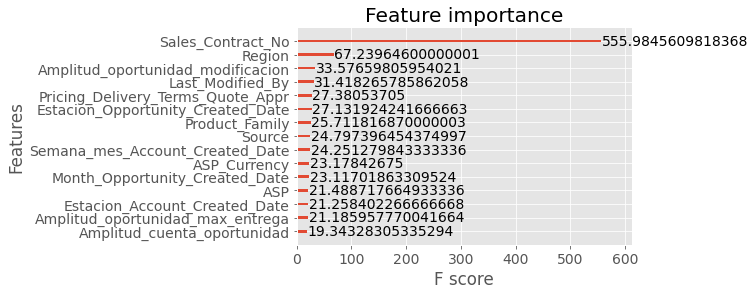

In [ ]:
# Ploteo de top 15 Feature Importance
plot_importance(model_xgboost, importance_type = "gain", max_num_features=15)

# Finalmente podemos ver cual es la variable
# que causa Target Leakage = 'Sales_Contract_No'

### Busqueda Hiperparametros XGBoost

In [ ]:
# Copiar todo lo mismo que antes, realizando un drop de 'Sales_Contract_No'

In [ ]:
# Actualizo df sin onehotencodear
df = df_boost.copy()

In [ ]:
# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Seleccion numericas
df_numericas = df.select_dtypes(include=['float64','int64'])

# Seleccion categoricas
df_cat = df.select_dtypes(include=['object'])

# Tranformacion de df_numericas a int.
df_prueba = df_numericas.copy()
columnas = df_prueba.columns

# Correr esta seccion solo si tenemos dudas.
#for i in columnas:
 #   for i2,v in enumerate(df_prueba[i].values):
  #      try:
   #         val = int(df_prueba[i].iloc[i2])
    #        df_prueba[i].iloc[i2] = val
     #   except:
      #    print(i)
       #   print(val)
        #  print(i2)

# Actualizo df_numericas
df_numericas = df_prueba

In [ ]:
# Eliminacion de Outliers con Random Forest.

# Instanciarlo
iso_forest = IsolationForest(max_samples = "auto", contamination = "auto")

# Fit
iso_forest.fit(df_numericas)

# Prediccion
outlier_pred = iso_forest.predict(df_numericas)
outlier_pred = [True if x == 1 else False for x in outlier_pred]

# Datos sin outliers
df_numericas = df_numericas[outlier_pred]

In [ ]:
# Unifico ambos df
df_unificado = pd.concat([df_cat, df_numericas], axis = 1)

# Actualizo el df
df = df_unificado.copy()

In [ ]:
# Categoricas y numericas para realizar sus respectivas transformaciones
cat_columns = df.select_dtypes(include=['object'])
num_columns = df.select_dtypes(include=['float64','int64'])
num_columns.drop('Stage', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Normalizo las variables numericas
scaler = StandardScaler()

In [ ]:
# Ordinal Encoder sobre las categoricas.
# Las categorías "nuevas" que aparezcan se imputan con el valor de unknown_value
o_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=99999999)

In [ ]:
#Escalamos las variables
scaled = scaler.fit_transform(num_columns)

In [ ]:
# Generamos un dataframe con las variables escaladas
num_columns1 = pd.DataFrame(scaled, columns = num_columns.columns)
num_columns = num_columns1

In [ ]:
# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
num_columns.replace("", nan_value, inplace=True)
num_columns.dropna(inplace=True)

In [ ]:
# polynomial features sobre las variables numéricas
poly = PolynomialFeatures(2)
poly.fit_transform(num_columns)

array([[ 1.00000000e+00,  4.96534955e-01,  8.25953655e-01, ...,
         1.24095582e-03,  4.64784992e-02,  1.74079596e+00],
       [ 1.00000000e+00, -2.01395690e+00, -1.21072168e+00, ...,
         1.15097027e+00,  5.15607462e-01,  2.30979950e-01],
       [ 1.00000000e+00, -2.01395690e+00, -1.21072168e+00, ...,
         6.81686949e-01, -3.60112101e-01,  1.90235013e-01],
       ...,
       [ 1.00000000e+00,  4.96534955e-01,  8.25953655e-01, ...,
         1.27354181e+00,  1.84894772e-01,  2.68433094e-02],
       [ 1.00000000e+00,  4.96534955e-01,  8.25953655e-01, ...,
         1.27354181e+00,  1.84894772e-01,  2.68433094e-02],
       [ 1.00000000e+00,  4.96534955e-01,  8.25953655e-01, ...,
         5.81522180e-01,  1.20778488e-01,  2.50849301e-02]])

In [ ]:
# Vuelvo a agregar Stage a num_columns
num_columns['Stage'] = df['Stage']

In [ ]:
# Generamos ordinales con las variables categoricas (OrdinalEncoder)
result = o_encoder.fit_transform(cat_columns)
cat_columns1 = pd.DataFrame(result, columns=cat_columns.columns)
cat_columns = cat_columns1

In [ ]:
# Actualizamos el df
df = pd.concat([num_columns, cat_columns],axis=1)                   

In [ ]:
# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Train test split quitando la variable causante de Targer Leakage
X = df.drop(['Stage','Sales_Contract_No'],axis=1)
y = df['Stage']

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
# Pipeline transformacion columnas
pipeline = Pipeline([("classifier", XGBClassifier(n_jobs=3, eval_metric="logloss", use_label_encoder=False))])

In [ ]:
# Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1
one_to_left = st.beta(10, 1) 

In [ ]:
# diccionario de parámetros 
params = {  
    "classifier__n_estimators": st.randint(20,150), # n. de árboles.
    "classifier__max_depth": st.randint(3, 12),     # máxima profundiad del árbol
    "classifier__learning_rate": st.uniform(0.05, 0.4), # learning rate (xgb’s “eta”)
    "classifier__colsample_bytree": one_to_left, # ratio de la muestra de las columnas a la hora de construir el árbol
    "classifier__subsample": one_to_left,     # ratio de la muestra de las observaciones
    'classifier__reg_alpha': st.uniform(0.05,10),   # término de regularización L1
    "classifier__min_child_weight": st.uniform(1,20), # Suma mínima del peso de la instancia (hessiano) requerida en los hijos
}

In [ ]:
# Definicion de la grilla
search_space = [{"classifier": [XGBClassifier(n_jobs=3, eval_metric="logloss", use_label_encoder=False)], 
                 **params,
                "classifier__gamma": st.uniform(0, 10), # reducción mínima de la pérdida requerida para hacer un split
                }]

In [ ]:
# definicion del modelo
model = RandomizedSearchCV(pipeline, search_space, n_iter=100, verbose=1, cv=3)

In [ ]:
# Entrentamiento
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('classifier',
                                              XGBClassifier(eval_metric='logloss',
                                                            n_jobs=3,
                                                            use_label_encoder=False))]),
                   n_iter=100,
                   param_distributions=[{'classifier': [XGBClassifier(colsample_bytree=0.9688800792820134,
                                                                      eval_metric='logloss',
                                                                      gamma=0.8914018960956793,
                                                                      learning_rate=0.1583795347221041,
                                                                      max_depth=9,
                                                                      min_child_weight=13.8513...
                                         'classifier__min_chi

In [ ]:
model.best_estimator_

Pipeline(steps=[('classifier',
                 XGBClassifier(colsample_bytree=0.9688800792820134,
                               eval_metric='logloss', gamma=0.8914018960956793,
                               learning_rate=0.1583795347221041, max_depth=9,
                               min_child_weight=13.851364479296592,
                               n_estimators=112, n_jobs=3,
                               reg_alpha=0.31698839031747966,
                               subsample=0.9357310527956283,
                               use_label_encoder=False))])

### Evaluacion

In [ ]:
# Prediccion binaria.
y_predicted_binary = model.predict(X_test)

# Prediccion proba
y_predicted = model.predict_proba(X_test)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_predicted_binary)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_predicted_binary)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predicted_binary)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_predicted_binary)
print('F1 score: %f' % f1)

Accuracy: 0.804878
Precision: 0.811500
Recall: 0.867004
F1 score: 0.838334


In [ ]:
# Puntaje AUC
roc_auc_score(y_test, y_predicted_binary)

0.7924196966282726

In [ ]:
# Curva ROC
logit_roc_auc = roc_auc_score(y_test, y_predicted_binary)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])

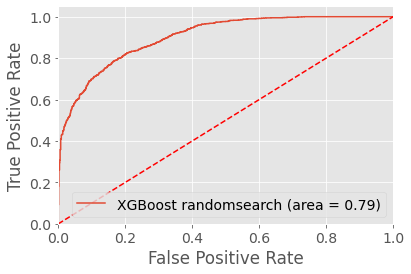

In [ ]:
# Plot
plt.figure()
plt.plot(fpr, tpr, label='XGBoost randomsearch (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

[[ 809  318]
 [ 210 1369]]


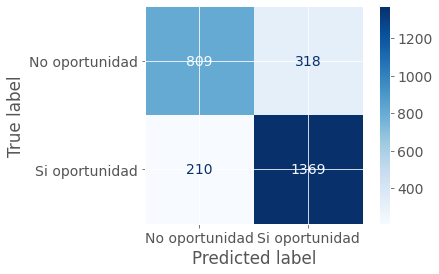

In [ ]:
# Matriz de Confusion
plt.style.use('ggplot')
plt.rc("font", size=14)

class_names = ['No oportunidad', 'Si oportunidad']

disp = plot_confusion_matrix(model, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues)

print(disp.confusion_matrix)

In [ ]:
#FEATURE IMPORTANCE

In [ ]:
# Seleccion de las importancias.
feature_importance = model.best_estimator_.named_steps["classifier"].feature_importances_

# Seleccion del modelo
xgb_model = model.best_estimator_.named_steps["classifier"]

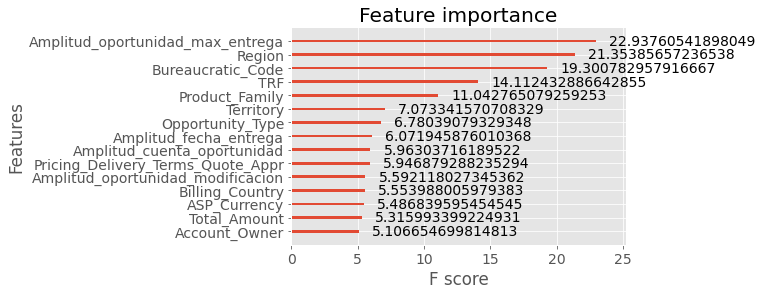

In [ ]:
# Ploteo de top 15 Feature Importance

plot_importance(xgb_model, importance_type = "gain", max_num_features=15)

In [ ]:
# DF de Feature Importance
data = np.array([X_train.columns, feature_importance]).T
pd.DataFrame(data, columns=['Feature','Importance']).sort_values('Importance',ascending=False)

,Feature,Importance
18,Amplitud_oportunidad_max_entrega,0.0903537
19,Region,0.0841152
21,Bureaucratic_Code,0.0760279
11,TRF,0.0555904
32,Product_Family,0.0434986
20,Territory,0.0278627
27,Opportunity_Type,0.0267087
15,Amplitud_fecha_entrega,0.0239181
16,Amplitud_cuenta_oportunidad,0.023489
0,Pricing_Delivery_Terms_Quote_Appr,0.0234254


### Busqueda del mejor modelo

In [ ]:
# Actualizo df sin onehotencodear
df = df_boost.copy()

In [ ]:
# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.
nan_value = float("NaN")

df.replace("", nan_value, inplace=True)

df.dropna(inplace=True)

In [ ]:
# Seleccion numericas
df_numericas = df.select_dtypes(include=['float64','int64'])

# Seleccion categoricas
df_cat = df.select_dtypes(include=['object'])

# Tranformacion de df_numericas a int.
df_prueba = df_numericas.copy()
columnas = df_prueba.columns

# Correr esta seccion solo si tenemos dudas.
#for i in columnas:
 #   for i2,v in enumerate(df_prueba[i].values):
  #      try:
   #         val = int(df_prueba[i].iloc[i2])
    #        df_prueba[i].iloc[i2] = val
     #   except:
      #    print(i)
       #   print(val)
        #  print(i2)

# Actualizo df_numericas
df_numericas = df_prueba

In [ ]:
# Eliminacion de Outliers con Random Forest.

# Instanciarlo
iso_forest = IsolationForest(max_samples = "auto", contamination = "auto")

# Fit
iso_forest.fit(df_numericas)

# Prediccion
outlier_pred = iso_forest.predict(df_numericas)
outlier_pred = [True if x == 1 else False for x in outlier_pred]

# Datos sin outliers
df_numericas = df_numericas[outlier_pred]

In [ ]:
# Unifico ambos df
df_unificado = pd.concat([df_cat, df_numericas], axis = 1)

# Actualizo el df
df = df_unificado.copy()

In [ ]:
# Categoricas y numericas para realizar sus respectivas transformaciones
cat_columns = df.select_dtypes(include=['object'])
num_columns = df.select_dtypes(include=['float64','int64'])
num_columns.drop('Stage', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Normalizo las variables numericas
scaler = StandardScaler()

In [ ]:
# Ordinal Encoder sobre las categoricas.
# Las categorías "nuevas" que aparezcan se imputan con el valor de unknown_value
o_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=99999999)

In [ ]:
#Escalamos las variables
scaled = scaler.fit_transform(num_columns)

In [ ]:
# Generamos un dataframe con las variables escaladas
num_columns1 = pd.DataFrame(scaled, columns = num_columns.columns)
num_columns = num_columns1

In [ ]:
# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
num_columns.replace("", nan_value, inplace=True)
num_columns.dropna(inplace=True)

In [ ]:
# polynomial features sobre las variables numéricas
poly = PolynomialFeatures(2)
poly.fit_transform(num_columns)

array([[ 1.00000000e+00,  4.95760148e-01,  8.27539003e-01, ...,
         1.75168801e-03,  5.68434289e-02,  1.84460668e+00],
       [ 1.00000000e+00, -2.01710445e+00, -1.20840226e+00, ...,
         1.15405093e+00,  5.08343643e-01,  2.23918419e-01],
       [ 1.00000000e+00, -2.01710445e+00, -1.20840226e+00, ...,
         7.02276413e-01, -3.58656645e-01,  1.83168032e-01],
       ...,
       [ 1.00000000e+00,  4.95760148e-01,  8.27539003e-01, ...,
         1.30666014e+00,  2.08583542e-01,  3.32964119e-02],
       [ 1.00000000e+00,  4.95760148e-01,  8.27539003e-01, ...,
         1.30666014e+00,  2.08583542e-01,  3.32964119e-02],
       [ 1.00000000e+00,  4.95760148e-01,  8.27539003e-01, ...,
         5.80268853e-01,  1.10731254e-01,  2.11305682e-02]])

In [ ]:
# Vuelvo a agregar Stage a num_columns
num_columns['Stage'] = df['Stage']

In [ ]:
# Generamos ordinales con las variables categoricas (OrdinalEncoder)
result = o_encoder.fit_transform(cat_columns)
cat_columns1 = pd.DataFrame(result, columns=cat_columns.columns)
cat_columns = cat_columns1

In [ ]:
# Actualizamos el df
df = pd.concat([num_columns, cat_columns],axis=1)                   

In [ ]:
# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Train test split quitando la variable causante de Targer Leakage
X = df.drop(['Stage','Sales_Contract_No'],axis=1)
y = df['Stage']

In [ ]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Pipeline transformacion columnas

pipeline = Pipeline([("classifier", XGBClassifier(n_jobs=3, eval_metric="logloss", use_label_encoder=False))])

In [ ]:
# Valores entre 0 y 1 mayormente cercanos a 1

one_to_left = st.beta(10, 1) 

In [ ]:
# diccionario de parámetros 
params = {  
    "classifier__n_estimators": st.randint(20,150), # n. de árboles.
    "classifier__max_depth": st.randint(3, 12),     # máxima profundiad del árbol
    "classifier__learning_rate": st.uniform(0.05, 0.4), # learning rate (xgb’s “eta”)
    "classifier__colsample_bytree": one_to_left, # ratio de la muestra de las columnas a la hora de construir el árbol
    "classifier__subsample": one_to_left,     # ratio de la muestra de las observaciones
    'classifier__reg_alpha': st.uniform(0.05,10),   # término de regularización L1
    "classifier__min_child_weight": st.uniform(1,20), # Suma mínima del peso de la instancia (hessiano) requerida en los hijos
}

In [ ]:
# Definicion de la grilla
search_space = [{"classifier": [XGBClassifier(n_jobs=3, eval_metric="logloss", use_label_encoder=False)], 
                 **params,
                "classifier__gamma": st.uniform(0, 10), # reducción mínima de la pérdida requerida para hacer un split
                },
                {"classifier": [LGBMClassifier(n_jobs=3, verbose=-1)],
                 **params},
                {"classifier": [CatBoostClassifier(thread_count=3, verbose=False)],
                 "classifier__n_estimators": st.randint(20,150), # n. de árboles.
                "classifier__max_depth": st.randint(3, 12),     # máxima profundiad del árbol
                "classifier__learning_rate": st.uniform(0.05, 0.4), # learning rate (xgb’s “eta”)
                "classifier__subsample": one_to_left,     # ratio de la muestra de las observaciones
                "classifier__reg_lambda": st.randint(1, 5)
                }]

In [ ]:
# definicion del modelo
model = RandomizedSearchCV(pipeline, search_space, n_iter=100, verbose=1, cv=3)

In [ ]:
# Entrentamiento
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('classifier',
                                              XGBClassifier(eval_metric='logloss',
                                                            n_jobs=3,
                                                            use_label_encoder=False))]),
                   n_iter=100,
                   param_distributions=[{'classifier': [XGBClassifier(eval_metric='logloss',
                                                                      n_jobs=3,
                                                                      use_label_encoder=False)],
                                         'classifier__colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb534357c...
                                         'classifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb5129e0590>,
                                         'classifier__n_estimators': <scipy.stats._distn_i

In [ ]:
model.best_params_

{'classifier': <catboost.core.CatBoostClassifier at 0x7fb51257cd50>,
 'classifier__learning_rate': 0.1846838939756842,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 147,
 'classifier__reg_lambda': 2,
 'classifier__subsample': 0.8848786552191966}

### Evaluacion

In [ ]:
# Prediccion binaria.
y_predicted_binary = model.predict(X_test)

# Prediccion de probabilidad
y_predicted = model.predict_proba(X_test)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_predicted_binary)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_predicted_binary)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predicted_binary)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_predicted_binary)
print('F1 score: %f' % f1)

Accuracy: 0.809064
Precision: 0.832740
Recall: 0.858191
F1 score: 0.845274


In [ ]:
# AUC
roc_auc_score(y_test, y_predicted_binary)

0.7955726272505002

In [ ]:
# Curva ROC
logit_roc_auc = roc_auc_score(y_test, y_predicted_binary)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])

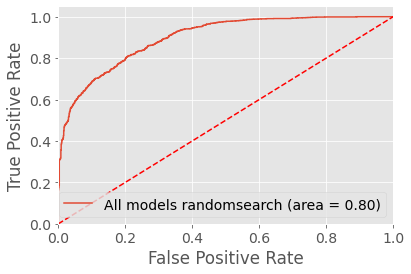

In [ ]:

plt.figure()
plt.plot(fpr, tpr, label='All models randomsearch (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

[[ 774  282]
 [ 232 1404]]


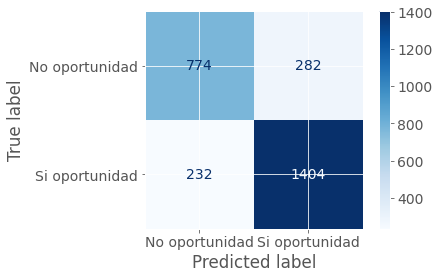

In [ ]:
# Matriz de Confusion

plt.style.use('ggplot')
plt.rc("font", size=14)

class_names = ['No oportunidad', 'Si oportunidad']

disp = plot_confusion_matrix(model, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues)

print(disp.confusion_matrix)

In [ ]:
#FEATURE IMPORTANCE

In [ ]:
# Seleccion de las importancias.
feature_importance = model.best_estimator_.named_steps["classifier"].feature_importances_

# Seleccion del modelo
clf_model = model.best_estimator_.named_steps["classifier"]

In [ ]:
# DF con importancias
data = np.array([X_train.columns, feature_importance]).T
pd.DataFrame(data, columns=['Feature','Importance']).sort_values('Importance',ascending=False)

,Feature,Importance
18,Amplitud_oportunidad_max_entrega,8.13459
16,Amplitud_cuenta_oportunidad,5.65502
12,Total_Amount,5.54573
17,Amplitud_oportunidad_modificacion,5.25339
13,Total_Taxable_Amount,4.94617
21,Bureaucratic_Code,4.78394
10,ASP_(converted),3.5323
15,Amplitud_fecha_entrega,3.30058
33,Product_Name,3.2965
44,Semana_mes_Opportunity_Created_Date,3.05466


### CatBoost Optimizado

In [ ]:
# Siendo que CatBoost obtuvo los mejores resultados, realizare una exhaustiva optimizacion de hiperparametros.

In [ ]:
# Actualizo df sin onehotencodear
df = df_boost.copy()

#Drop de las dummys que no requieren transformacion
dummys = ['Pricing_Delivery_Terms_Quote_Appr','Pricing_Delivery_Terms_Approved','Bureaucratic_Code_0_Approval',
          'Bureaucratic_Code_0_Approved','Brand','Product_Type','Size','Product_Category_B',
          'Price']
df.drop(dummys, axis=1, inplace=True)

# Drop de variables que obtuvieron Feature Importance 
#df.drop(to_drop, axis=1, inplace=True)

# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)

# Seleccion numericas
df_numericas = df.select_dtypes(include=['float64','int64'])

# Tranformacion de df_numericas a int.

df_prueba = df_numericas.copy()
columnas = df_prueba.columns

for i in columnas:
    for i2,v in enumerate(df_prueba[i].values):
        try:
            val = int(df_prueba[i].iloc[i2])
            df_prueba[i].iloc[i2] = val
        except:
          print(i)
          print(val)
          print(i2)

# Actualizo df_numericas
df_numericas = df_prueba

# Eliminacion de Outliers con Random Forest.

# Instanciarlo
iso_forest = IsolationForest(max_samples = "auto", contamination = "auto")

# Fit
iso_forest.fit(df_numericas)

# Prediccion
outlier_pred = iso_forest.predict(df_numericas)
outlier_pred = [True if x == 1 else False for x in outlier_pred]

# Datos sin outliers
df_numericas = df_numericas[outlier_pred]

#Scaler
scaler = StandardScaler()

#Escalamos las variables
scaled = scaler.fit_transform(df_numericas)

# Generamos un dataframe con las variables escaladas
df_numericas1 = pd.DataFrame(scaled, columns = df_numericas.columns)
df_numericas = df_numericas1

# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
df_numericas.replace("", nan_value, inplace=True)
df_numericas.dropna(inplace=True)

# polynomial features sobre las variables numéricas
poly = PolynomialFeatures(2)
poly.fit_transform(df_numericas)

# Ordinal Encoder sobre las categoricas.
# Las categorías "nuevas" que aparezcan se imputan con el valor de unknown_value
o_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=99999999)

# Genero el df categoricas
cat_columns = df.drop(df_numericas.columns, axis=1)

# Dropeo de valores "NaN" ya que se encuentra en muchas variables categoricas.

nan_value = float("NaN")
cat_columns.replace("", nan_value, inplace=True)
cat_columns.dropna(inplace=True)

# Generamos ordinales con las variables categoricas (OrdinalEncoder)
result = o_encoder.fit_transform(cat_columns)
cat_columns1 = pd.DataFrame(result, columns=cat_columns.columns)
cat_columns = cat_columns1

# Vuelvo a agregar Stage a num_columns
df_numericas['Stage'] = df['Stage']

# Actualizamos el df
df_dummys = df_boost[dummys]
df = pd.concat([df_numericas, cat_columns, df_dummys],axis=1)

# Dropeo de valores "NaN" ya que se encuentra en muchas variables numericas.

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)

# Train test split quitando la variable causante de Targer Leakage
X = df.drop(['Stage','Sales_Contract_No'],axis=1)
y = df['Stage']


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Pipeline transformacion columnas
pipeline = Pipeline([("classifier", CatBoostClassifier())])

In [ ]:
# Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1
one_to_left = st.beta(10, 1) 

In [ ]:
# Espacio de busqueda
# Cambie rangos de hiperparametros a partir de lo observado en el anterior modelo (Lambda por ej se bajo de valor),
# volvi a correr el modelo y volvi a ajustar.
search_space = [
                {"classifier": [CatBoostClassifier(thread_count=3, verbose=False)],
                 "classifier__n_estimators": st.randint(110,200), # n. de árboles.
                "classifier__max_depth": st.randint(6, 13),     # máxima profundiad del árbol
                "classifier__learning_rate": st.uniform(0.01, 0.15), # learning rate (xgb’s “eta”)
                "classifier__subsample": one_to_left, # ratio de la muestra de las observaciones
                "classifier__reg_lambda": st.uniform(0.05, 0.4),
                "classifier__border_count": st.randint(40,70),
                "classifier__thread_count": st.randint(4,8),
                "classifier__colsample_bylevel": one_to_left, # ratio de la muestra de las columnas a la hora de construir el árbol
                }
               ]

In [ ]:
# Definicion del modelo
model = RandomizedSearchCV(pipeline, search_space, n_iter=100, verbose=1, cv=3)

In [ ]:
# Fit
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('classifier',
                                              <catboost.core.CatBoostClassifier object at 0x7fb512269c90>)]),
                   n_iter=100,
                   param_distributions=[{'classifier': [<catboost.core.CatBoostClassifier object at 0x7fb512203690>],
                                         'classifier__border_count': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb5122f2850>,
                                         'classifier__colsample_byl...
                                         'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb5122038d0>,
                                         'classifier__reg_lambda': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb51257cd90>,
                                         'classifier__subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb512254410>,
                          

In [ ]:
# Exploracion
model.best_params_

{'classifier': <catboost.core.CatBoostClassifier at 0x7fb512203690>,
 'classifier__border_count': 51,
 'classifier__colsample_bylevel': 0.9852101602453104,
 'classifier__learning_rate': 0.11827401772505228,
 'classifier__max_depth': 9,
 'classifier__n_estimators': 199,
 'classifier__reg_lambda': 0.3580808194371434,
 'classifier__subsample': 0.9229427446623457,
 'classifier__thread_count': 4}

### Evaluacion

In [ ]:
# Prediccion binaria.
y_predicted_binary = model.predict(X_test)

# Prediccion de probabilidad
y_predicted = model.predict_proba(X_test)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_predicted_binary)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_predicted_binary)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predicted_binary)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_predicted_binary)
print('F1 score: %f' % f1)

Accuracy: 0.824763
Precision: 0.847742
Recall: 0.873670
F1 score: 0.860511


In [ ]:
# AUC
roc_auc_score(y_test, y_predicted_binary)

0.809542765498405

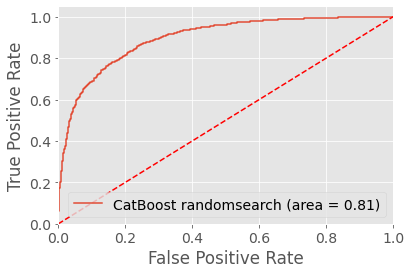

In [ ]:
# Curva ROC

logit_roc_auc = roc_auc_score(y_test, y_predicted_binary)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])

#Plot
plt.figure()
plt.plot(fpr, tpr, label='CatBoost randomsearch (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

[[ 691  236]
 [ 190 1314]]


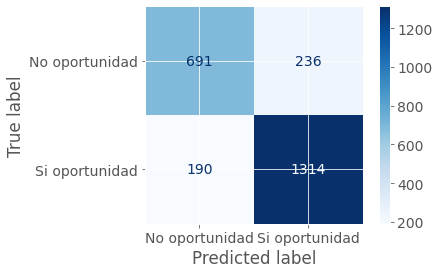

In [ ]:
# Matriz de Confusion

plt.style.use('ggplot')
plt.rc("font", size=14)

class_names = ['No oportunidad', 'Si oportunidad']

disp = plot_confusion_matrix(model, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues)

print(disp.confusion_matrix)

# Feature Importance

In [ ]:
# Seleccion de las importancias.
feature_importance = model.best_estimator_.named_steps["classifier"].feature_importances_

# Seleccion del modelo
clf_model = model.best_estimator_.named_steps["classifier"]

In [ ]:
# DF con importancias
data = np.array([X_train.columns, feature_importance]).T
df_feature_importance = pd.DataFrame(data, columns=['Feature','Importance']).sort_values('Importance',ascending=False)
lista = range(1,len(df_feature_importance['Feature'])+1)
df_feature_importance.index = lista
df_feature_importance

,Feature,Importance
1,Amplitud_oportunidad_max_entrega,12.0632
2,Total_Taxable_Amount,8.92281
3,Amplitud_cuenta_oportunidad,8.57204
4,Amplitud_oportunidad_modificacion,7.253
5,Amplitud_fecha_entrega,7.20282
6,Total_Amount,5.71043
7,Month_num,4.33615
8,Month_Opportunity_Created_Date,3.74427
9,Semana_mes_Opportunity_Created_Date,3.39449
10,Product_Name,3.15286


In [ ]:
# Guardo aqui las variables con importancias en 0 o cercanos a 0 para eliminarlas y volver a fitear.
# Por alguna razon, borrar estas variables disminuye el AUC. No las borro.

#to_drop = ['Product_Category_B','Product_Type','Size','Currency','Price','Brand']

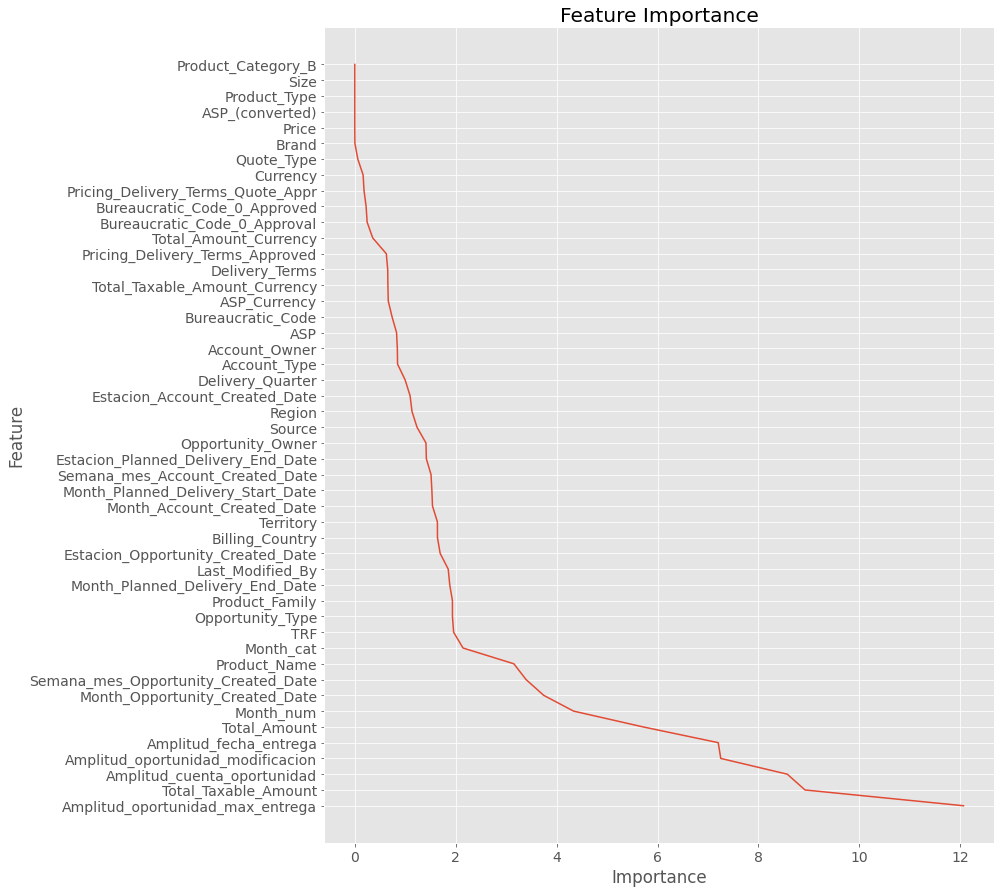

In [ ]:
#Plot de Feature Importance
import matplotlib.pyplot as plt

x = df_feature_importance['Importance']
y = df_feature_importance['Feature']

plt.figure(figsize=[12,15])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.plot(x,y)

## Shap Values

In [ ]:
# importar
!pip install shap
import shap
shap.initjs()

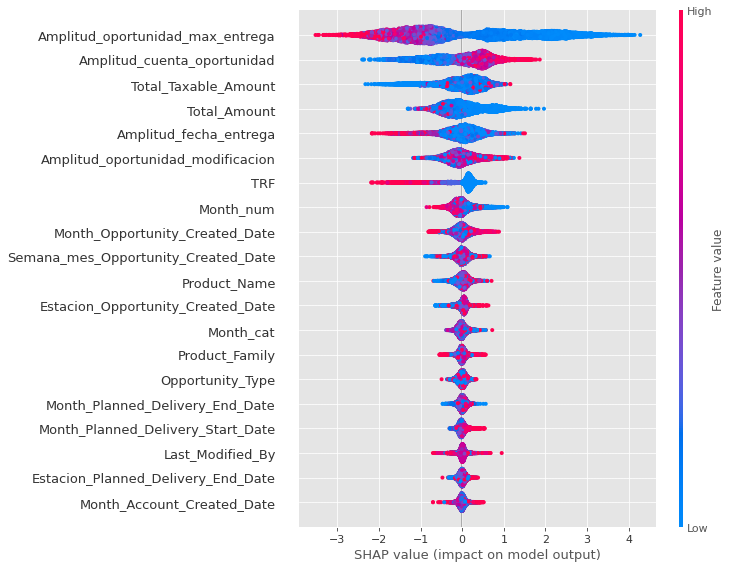

In [ ]:
shap.initjs()

#SHAP VALUES PLOT
explainer = shap.TreeExplainer(clf_model)
shap_values = explainer.shap_values(X)

# Resumen de los efectos de todas las variables.
shap.summary_plot(shap_values, X)

In [ ]:
shap.initjs()

# Visualizaion de las explicaciones SHAP de la primer prediccion (puede cambiarse).
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
shap.initjs()

# Visualizaion de las explicaciones SHAP de la primer prediccion (puede cambiarse).
shap.force_plot(explainer.expected_value, shap_values[2,:], X.iloc[2,:])

In [ ]:
shap.initjs()

# Visualizaion de las explicaciones SHAP de la primer prediccion (puede cambiarse).
shap.force_plot(explainer.expected_value, shap_values[100,:], X.iloc[100,:])

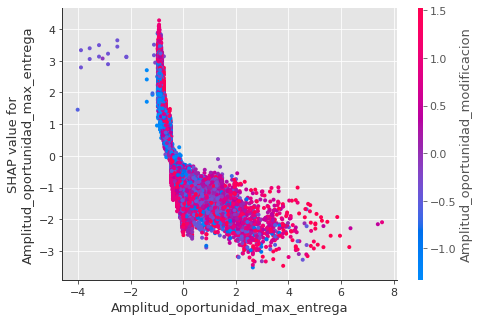

In [ ]:
shap.initjs()

# Creacion de un plot de dependencia SHAP para demostrar el efecto de una variable en particular (Amplitud_oportunidad_max_entrega) en todas las predicciones. 
# Tambien se observa su interaccion con Amplitud_oportunidad_modificacion.

shap.dependence_plot("Amplitud_oportunidad_max_entrega", shap_values, X)

# Prediccion de datos de Evaluacion

In [ ]:
# Lectura del dataset 

df_validacion = pd.read_csv('/content/drive/MyDrive/ML_Desafio/df_validacion_final.csv')

In [ ]:
#Drop de columna extra que se genero
df_validacion.drop(df_validacion.columns[0], axis=1, inplace=True)

In [ ]:
# ID
ID_Oportunidad = df_validacion['Opportunity_ID'].values

# Probabilidad de exito (predicha):
results1 = model.predict_proba(df_validacion)

In [ ]:
# Df Resultados
results = pd.DataFrame(data=results1, columns=['ID_Oportunidad','Probabilidad_exito'])
results['ID_Oportunidad'] = ID_Oportunidad
results['ID'] = df_validacion['ID'].values
results.index = results['ID']
results.drop('ID', axis=1, inplace=True)
results

,ID_Oportunidad,Probabilidad_exito
ID,,
6140,10689,0.797824
6146,10689,0.797824
6151,10689,0.813940
6118,10690,0.441720
6124,10690,0.441720
...,...,...
16345,12364,0.881980
15218,12365,0.122464
15224,12366,0.074632


In [ ]:
# Descargo el Df con las predicciones.

results.to_csv('resultados.csv')